In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

  1. Количество наблюдений в дата сете: 

In [4]:
dataset.shape[0]

4622

2. Названия столбцов:

In [5]:
dataset.columns.tolist()

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

3. Самая частая позиция в заказе:

In [6]:
dataset.groupby('item_name')['quantity'].sum().idxmax()

'Chicken Bowl'

4. Построить гистрограмму частоты заказов по позициям'

4. Построить гистрограмму частоты заказов по позициям


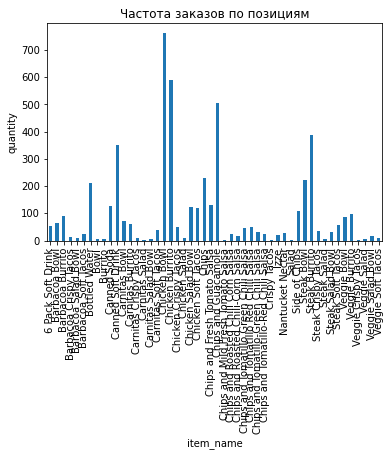

In [7]:
hist = dataset.groupby('item_name')['quantity'].sum().plot(kind='bar')
hist.set_ylabel('quantity')
plt.title('Частота заказов по позициям')
print('4. Построить гистрограмму частоты заказов по позициям')
plt.show()

5. Измените тип переменной item_price c с помощью лямбды функции:

In [8]:
dataset['item_price'] = dataset['item_price'].apply(lambda x: float(x[1:-1]))
print('5. Измените тип переменной item_price c с помощью лямбды функции: \n', dataset.dtypes)

5. Измените тип переменной item_price c с помощью лямбды функции: 
 order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object


6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

6. Построить гистограмму кол-во денег заработанных по каждой позиции


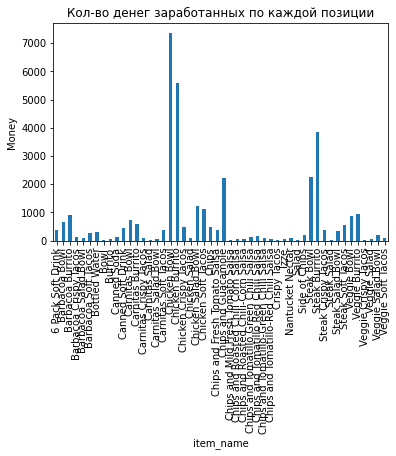

In [9]:
dataset.groupby('item_name')['item_price'].sum().plot(kind='bar')
plt.xlabel('item_name')
plt.ylabel('Money')
plt.title('Кол-во денег заработанных по каждой позиции')
print('6. Построить гистограмму кол-во денег заработанных по каждой позиции')
plt.show()

7. Средняя сумма заказа? (минимум 2 способа)

In [10]:
print('\t 1 способ: ', dataset['item_price'].sum() / len(dataset.groupby('order_id')))
total_order_sum = dataset['item_price'].sum()
num_orders = len(set(dataset['order_id']))
average_order_price = total_order_sum / num_orders
print('\t 2 способ: ', average_order_price)


	 1 способ:  18.811428571428575
	 2 способ:  18.811428571428575


8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [12]:
print('\t Среднее: ', dataset.quantity.sum() / len(dataset.groupby('order_id')))
print('\t Минимальное: ', dataset.groupby('order_id').quantity.sum().min())
print('\t Максимальное: ', dataset.groupby('order_id').quantity.sum().max())
print('\t Медианное: ', dataset.groupby('order_id').quantity.sum().median())

	 Среднее:  2.711014176663032
	 Минимальное:  1
	 Максимальное:  35
	 Медианное:  2.0


9. Определить статистику заказов стейков, а также статистику заказов прожарки.

In [19]:
total = dataset[dataset['item_name'].str.contains('Steak')].groupby(['item_name'])['quantity', 'item_price'].describe()
total

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


quantity                      ... item_price              
                      count      mean       std  ...        50%    75%    max
item_name                                        ...                         
Steak Bowl            211.0  1.047393  0.234278  ...       9.25  11.75  26.07
Steak Burrito         368.0  1.048913  0.239889  ...       9.25  11.75  27.75
Steak Crispy Tacos     35.0  1.028571  0.169031  ...       9.25  11.75  17.98
Steak Salad             4.0  1.000000  0.000000  ...       8.99   8.99   8.99
Steak Salad Bowl       29.0  1.068966  0.257881  ...      11.89  11.89  23.78
Steak Soft Tacos       55.0  1.018182  0.134840  ...       9.25   9.25  18.50

[6 rows x 16 columns]

In [20]:
total = dataset['choice_description'].str.split(expand=True).stack().reset_index(level=1, drop=True).to_frame('roasting').merge(dataset, left_index=True, right_index=True)
total = total[total['roasting'].str.contains('Mild|Medium|Hot')]
total['roasting'] = total.roasting.str.strip(',[]()')
total = total.groupby(['roasting']).agg({"quantity": "sum", "order_id": "count"}).reset_index()
total = total.rename(columns={"order_id": "times_ordered"})
total

,roasting,quantity,times_ordered
0,Hot,275,262
1,Medium,425,403
2,Mild,405,382


10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [ ]:
dataset['price_rubles'] = dataset['item_price'].apply(lambda value: str(round(value * 71, 2)) + ' RUB')
dataset.head(5)

,order_id,quantity,item_name,choice_description,item_price,price_rubles
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,169.69 RUB
1,1,1,Izze,[Clementine],3.39,240.69 RUB
2,1,1,Nantucket Nectar,[Apple],3.39,240.69 RUB
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,169.69 RUB
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1205.58 RUB


11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.

In [17]:
group_order = dataset.groupby('order_id').agg({'item_name': lambda x: ", ".join(x), 'item_price': np.sum, 'quantity': np.sum})
group_order[['quantity', 'item_name']]

,quantity,item_name
order_id,,
1,4,"Chips and Fresh Tomato Salsa, Izze, Nantucket ..."
2,2,Chicken Bowl
3,2,"Chicken Bowl, Side of Chips"
4,2,"Steak Burrito, Steak Soft Tacos"
5,2,"Steak Burrito, Chips and Guacamole"
...,...,...
1830,2,"Steak Burrito, Veggie Burrito"
1831,3,"Carnitas Bowl, Chips, Bottled Water"
1832,2,"Chicken Soft Tacos, Chips and Guacamole"


In [21]:
dataset[dataset['item_name'].str.contains('Steak')].groupby('order_id').agg({'quantity':np.sum,
                                'item_name': lambda x: ", ".join(x), 
                                'item_price':np.sum})

,quantity,item_name,item_price
order_id,,,
4,2,"Steak Burrito, Steak Soft Tacos",21.00
5,1,Steak Burrito,9.25
16,1,Steak Burrito,8.99
20,1,Steak Burrito,11.75
21,1,Steak Burrito,8.99
...,...,...,...
1810,1,Steak Crispy Tacos,11.75
1818,1,Steak Salad Bowl,9.39
1829,1,Steak Burrito,11.75


12. Определить цену по каждой позиции в отдельности. 

In [24]:
contains_and = dataset.item_name.str.contains('and')
dataset.loc[contains_and, ('price_for_one_item')] = round((dataset['item_price'] - 2.15) / dataset['quantity'], 2)
if not np.all(contains_and == False):
    dataset.loc[~contains_and, ('price_for_one_item')] = round(dataset['item_price'] / dataset['quantity'], 2)
dataset.loc[contains_and, ('item_name')] = dataset[contains_and]['item_name'].apply(lambda row: row[10:])

pr_for_1_item = dataset.groupby('item_name').price_for_one_item.agg('unique').reset_index()
pr_for_1_item["mean_price"] = pr_for_1_item["price_for_one_item"].apply(lambda row: round(np.mean(list(row)), 2))
pr_for_1_item[~pr_for_1_item.item_name.str.contains('and')]

,item_name,price_for_one_item,mean_price
0,6 Pack Soft Drink,[6.49],6.49
1,Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]",10.28
2,Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]",10.21
3,Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]",10.37
4,Barbacoa Salad Bowl,"[11.89, 9.39]",10.64
5,Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]",10.37
6,Bottled Water,"[1.09, 1.5]",1.30
7,Bowl,[7.4],7.40
8,Burrito,[7.4],7.40
9,Canned Soda,[1.09],1.09
